In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!unzip gdrive/MyDrive/Colab\ Notebooks/data/household_power_consumption.zip

Archive:  gdrive/MyDrive/Colab Notebooks/data/household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


/content/gdrive/MyDrive/Colab Notebooks/data/household_power_consumption.zip

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('household_power_consumption.txt', delimiter=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Question 14 - 16

In [36]:
df_quiz = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/Time_series_analysis_and_forecast_DATASET.csv", parse_dates=['FullDate'], index_col='FullDate')

In [37]:
df_quiz.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [38]:
df_daily = df_quiz.resample('D').sum()

### Question 11

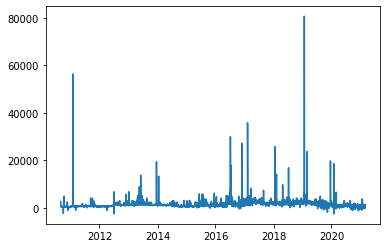

In [41]:
plt.plot(df_daily['ElecPrice'])
plt.show()

### Question 12

In [43]:
from statsmodels.tsa.stattools import adfuller

In [49]:
adf_result_sl = adfuller(df_daily['SysLoad'])
adf_result_gp = adfuller(df_daily['GasPrice'])

In [51]:
print(f"p-value of SysLoad: {adf_result_sl[1]}\np-value of GasPrice: {adf_result_gp[1]}")

p-value of SysLoad: 0.004253725504574117
p-value of GasPrice: 0.04502721288462542


### Question 13

In [54]:
print(f"Critical values of SysLoad: {adf_result_sl[4]}")
print(f"Critical values of GasPrice: {adf_result_gp[4]}")

Critical values of SysLoad: {'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499}
Critical values of GasPrice: {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}


In [55]:
df_daily = df_daily.reset_index()

In [56]:
df_daily = df_daily.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

In [57]:
train_df = df_daily.loc[:2756, ['ds', 'y']]
test_df = df_daily.loc[2757:, ['ds', 'y']]

In [58]:
train_df.shape,test_df.shape

((2757, 2), (1077, 2))

In [59]:
train_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [60]:
from fbprophet import Prophet

In [61]:
model = Prophet()
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
test_df.shape

(1077, 2)

In [64]:
test_df.columns

Index(['ds', 'y'], dtype='object')

In [65]:
forecast = model.predict(test_df)

In [66]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,77.484551,4851.681786,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,199.190224,5116.552464,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,311.069844,5072.414809,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,358.684868,5115.870647,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-238.014126,4654.210146,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [67]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [68]:
prediction = forecast['yhat']

In [78]:
import numpy as np

In [128]:
mape = mean_absolute_percentage_error(test_df['y'], prediction)
mape * 100

549.4751413716547

In [83]:
def mape(y_true, y_pred):
    length = len(y_true)
    mae = np.sum((y_true - y_pred) / y_true)
    return mae * 100

In [84]:
mape_test = mape(test_df['y'], prediction)

In [85]:
mape_test

0.0

### QUestion 15

In [94]:
rmse = np.sqrt(mean_squared_error(test_df['y'], prediction))
rmse

3218.15577651241

### Question 16

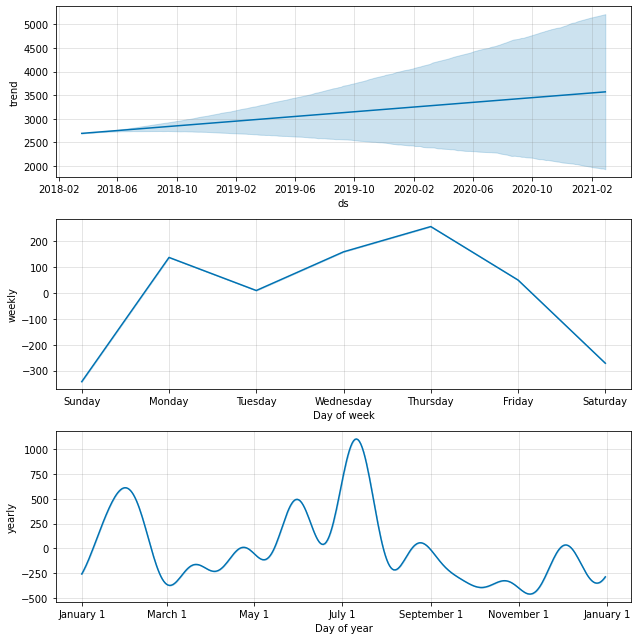

In [95]:
model.plot_components(forecast)
plt.show()

### Question 17 - 19

In [96]:
df_daily = df_daily.rename(columns={'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3'})

In [97]:
train_df = df_daily[:2757]
test_df = df_daily[2757:]

In [98]:
test_x = test_df[['ds', 'add1', 'add2', 'add3']]
test_y = test_df['y']

In [99]:
test_x.head()

,ds,add1,add2,add3
2757,2018-03-20,7696.91130,540.0,201.5880
2758,2018-03-21,4658.05865,571.2,203.2560
2759,2018-03-22,19161.78525,722.4,203.2560
2760,2018-03-23,18090.43435,811.2,198.6456
2761,2018-03-24,3763.53865,832.8,180.2160


In [100]:
test_y.head()

2757    1833.00
2758    1730.49
2759    2260.55
2760    2138.76
2761    1721.70
Name: y, dtype: float64

In [101]:
train_df.shape, test_df.shape

((2757, 5), (1077, 5))

In [102]:
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [103]:
model2.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
forecast2 = model2.predict(test_x)

In [105]:
prediction2 = forecast2['yhat']

### Question 17

In [107]:
mape2 = mean_absolute_percentage_error(test_df['y'], prediction2)
mape2 * 100

233.74494702819595

### Question 18

In [108]:
rms2 = np.sqrt(mean_squared_error(test_df['y'], prediction2))
rms2

2709.6493421662344

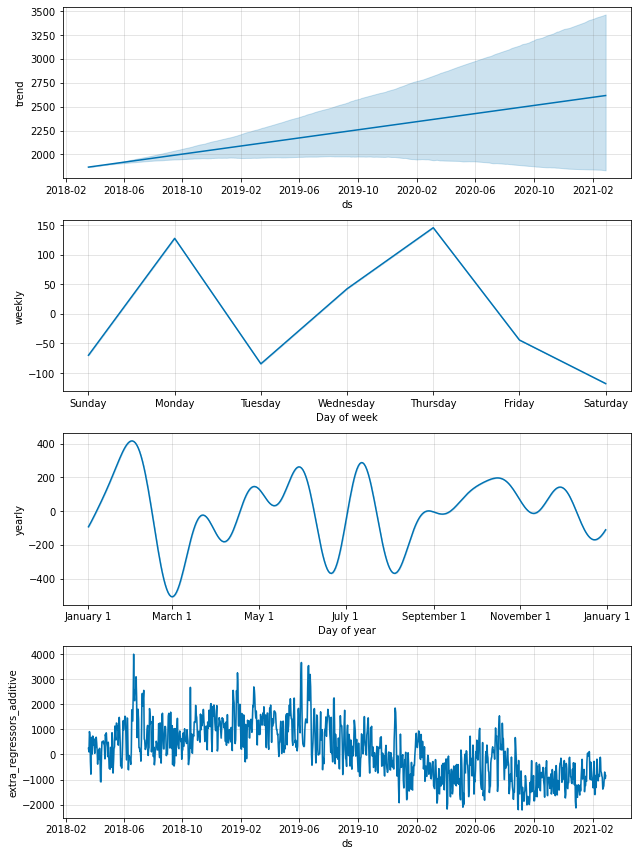

In [109]:
model2.plot_components(forecast2)
plt.show()

### Question 20

In [124]:
model3 = Prophet()
model3.add_regressor('add2')
model3.add_regressor('add3')

In [122]:
train_df.pop('add1')

0       41565.38000
1       38898.99000
2       41665.76000
3       35638.08500
4       35611.41000
           ...     
2752    27139.02585
2753    19710.46400
2754     1079.34705
2755    -4102.43795
2756     8731.39945
Name: add1, Length: 2757, dtype: float64

In [125]:
model3.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [126]:
forecast3 = model3.predict(test_df)
prediction3 = forecast3['yhat']

In [127]:
mape3 = mean_absolute_percentage_error(test_df['y'], prediction3)
mape3 * 100

324.3416934732103